In [ ]:
pip install Pipeline

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install SMOTE

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade imblearn==0.0 --user

Requirement already up-to-date: imblearn==0.0 in c:\programdata\anaconda3\lib\site-packages (0.0)
Note: you may need to restart the kernel to use updated packages.


# 1.Getting the system ready and loading the data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
import imblearn
from imblearn.under_sampling import RandomUnderSampler

# Reading data

In [ ]:
train = pd.read_csv('E:/Project/train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test = pd.read_csv('E:/Project/test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
#Make a copy of the train and test data so  datasets we would not lose the original datasets.
train_original=train.copy()
test_original=test.copy()



# Understanding the data

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

There are  12 independent variables and 1 target variable, i.e. Loan_Status in the train dataset.

In [ ]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

#similar features in the test dataset as the train dataset except for the Loan_Status. 
#We can predict the Loan_Status using the model built using the train data.

In [ ]:
train.shape

(614, 13)

# test.shape

In [ ]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
#Normalize can be set to True to print proportions instead of number

In [ ]:
train['Loan_Status'].value_counts(normalize=True) 

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

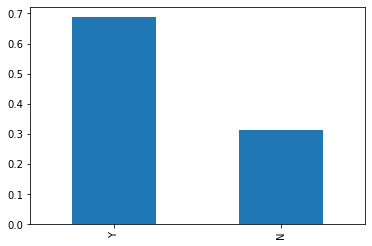

In [ ]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

#The loan of 422(around 69%) people out of 614 were approved.

# Univariate Analysis

# Independent Variable (Categorical)

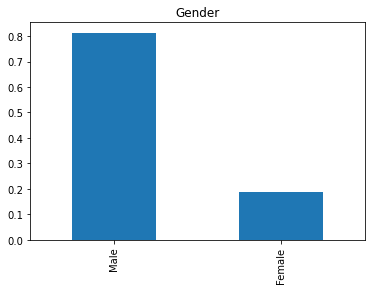

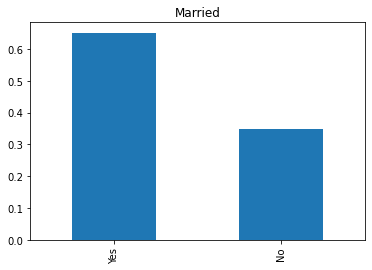

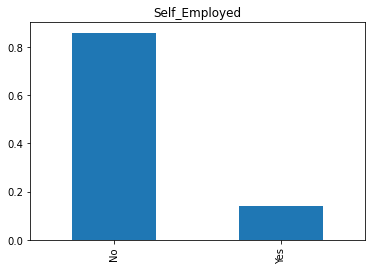

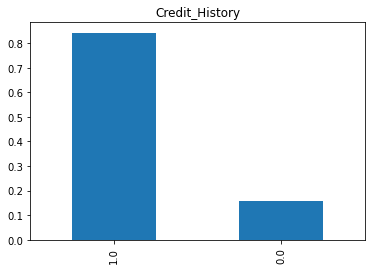

In [ ]:
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

It can be inferred from the above bar plots that:
80% of applicants in the dataset are male
65% of the applicants in the dataset are married.
15% of applicants in the dataset are self-employed.
85% of applicants have repaid their doubts.

# Independent Variable (Ordinal)

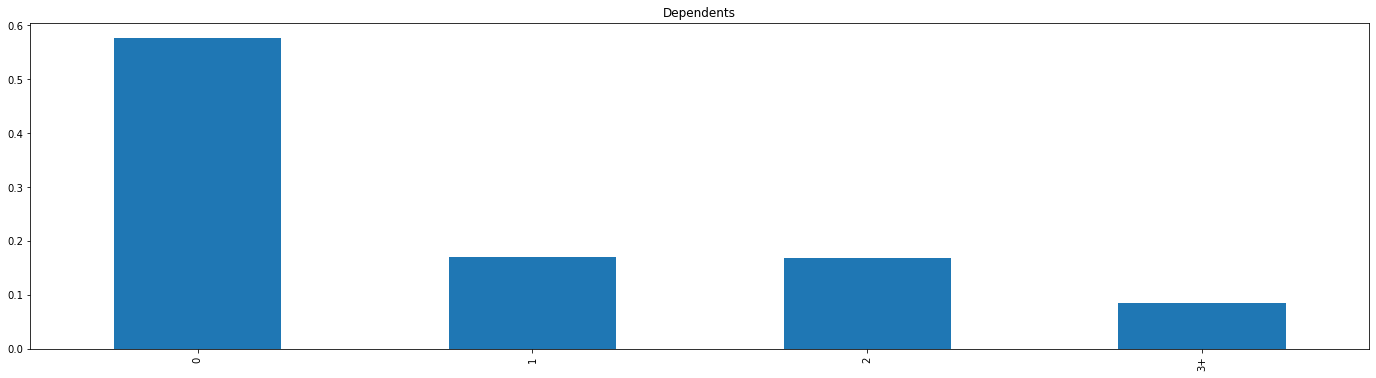

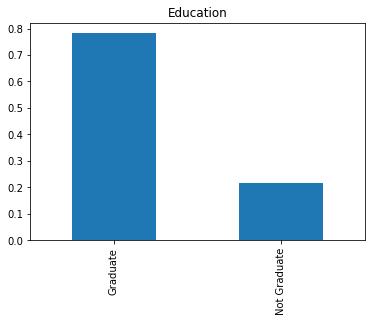

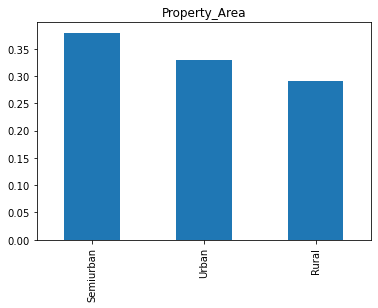

In [ ]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

The following inferences can be made from the above bar plots:
Most of the applicants don't have any dependents.
80% of the applicants are Graduate.
Most of the applicants are from the Semiurban area.

# Independent Variable (Numerical)

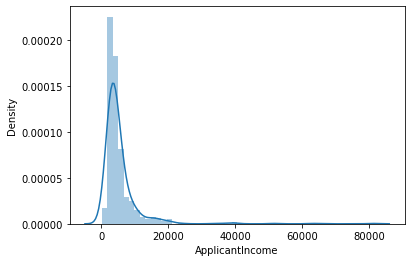

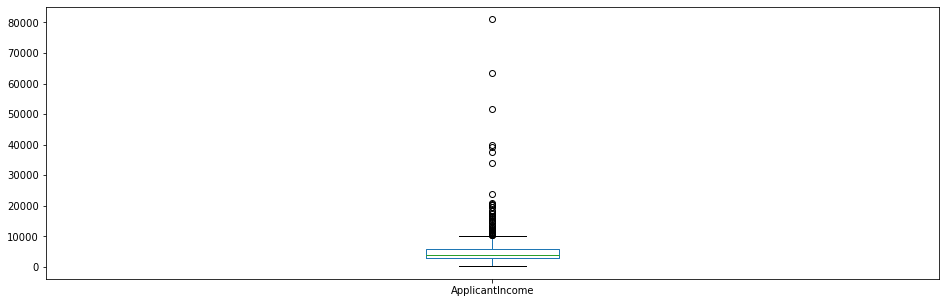

In [ ]:
sns.distplot(train['ApplicantIncome'])
plt.show()
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

It can be inferred that
*Most of the data in the distribution of applicant income are towards the left which means it is not normally distributed. 
*The boxplot confirms the presence of a lot of outliers/extreme values. 
*Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education.

Text(0.5, 0.98, '')

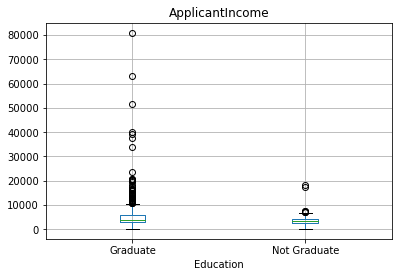

In [ ]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

In [ ]:
#higher number of graduates with very high incomes, which are appearing to be outliers.

# Co-applicant income distribution.

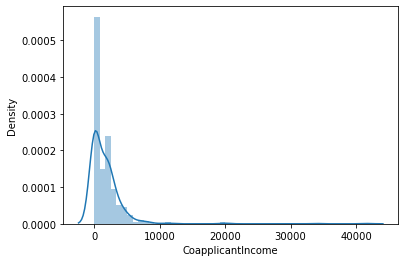

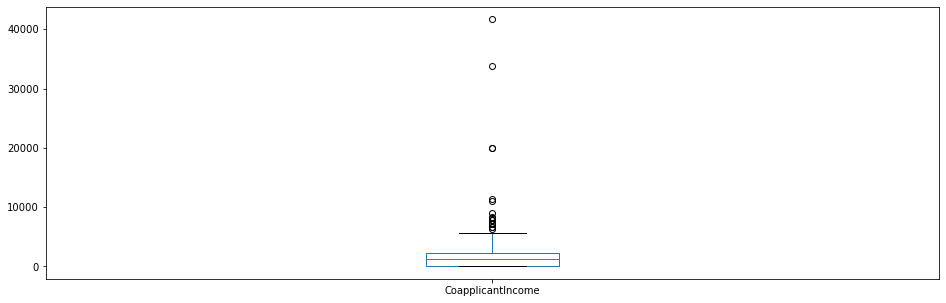

In [ ]:
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [ ]:
#The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed.

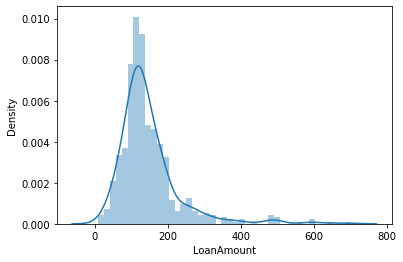

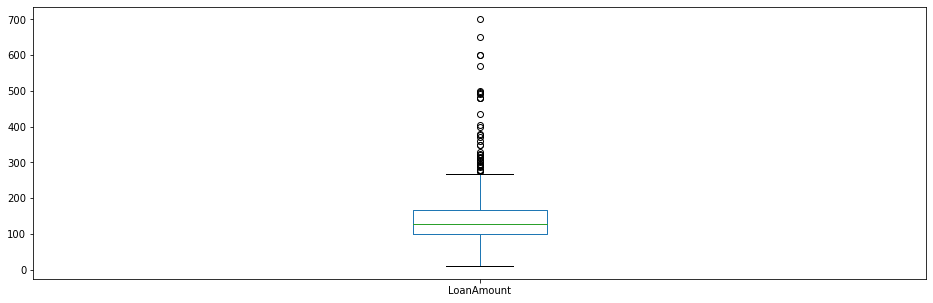

In [ ]:
train.notna()
sns.distplot(train['LoanAmount'])
plt.show()
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

In [ ]:
#lot of outliers in this variable and the distribution is fairly normal.

# Bivariate Analysis

#Applicants with high incomes should have more chances of loan approval.
#Applicants who have repaid their previous debts should have higher chances of loan approval.
#Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.
#Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.

# Categorical Independent Variable vs Target Variable

# Gender vs Loan Status

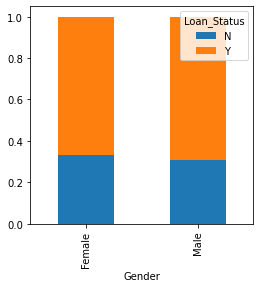

In [ ]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

It can be inferred 
The proportion of male and female applicants is more or less the same for both approved and unapproved loans.

# Married vs Loan Status
#Dependents vs Loan status
#Education vs Loan status
#Self Employed vs Loan Status

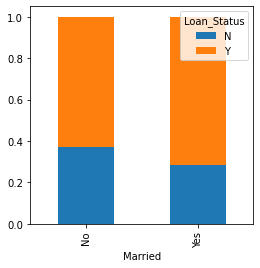

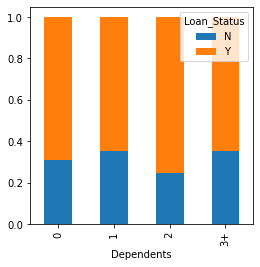

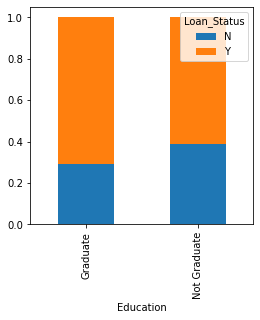

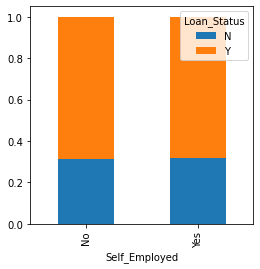

In [ ]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

The proportion of married applicants is higher for approved loans.
There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

# Credit History vs Loan status
#Property area vs Loan Status

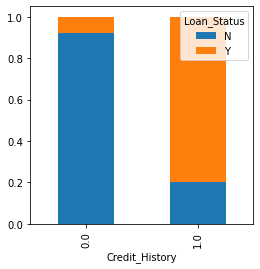

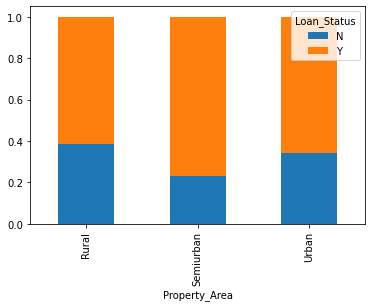

In [ ]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

It seems people with a credit history as 1 have  get their loans approved.
The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.

# Numerical Independent Variable vs Target Variable


To find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<AxesSubplot:xlabel='Loan_Status'>

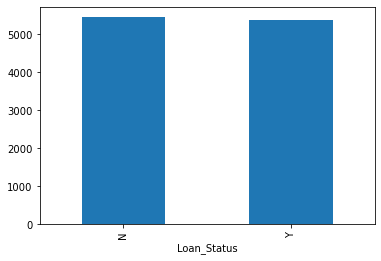

In [ ]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

#The y-axis represents the mean applicant income. We don’t see any change in the mean income. 
#Then make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

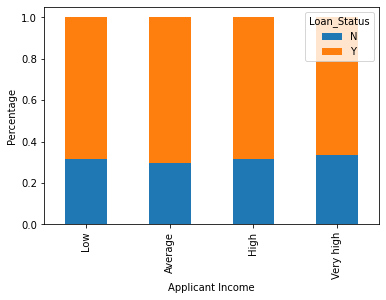

In [ ]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Applicant Income')
P=plt.ylabel('Percentage')

#It can be inferred that Applicant's income does not affect the chances of loan approval.
#"if the applicant's income is high the chances of loan approval will also be high". so this assumption is wrong

# co-applicant income vs Loan Status

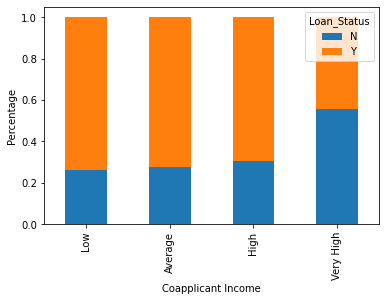

In [ ]:
bins=[0,2000,4000,8000,42000]
group=['Low','Average','High','Very High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Coapplicant Income')
P=plt.ylabel('Percentage')

#It shows that if co-applicants income is less the chances of loan approval are high.but it is not correct.
#We can combine the Applicant Income and Co-applicant Income and see the combined effect of Total Income on the Loan_Status.

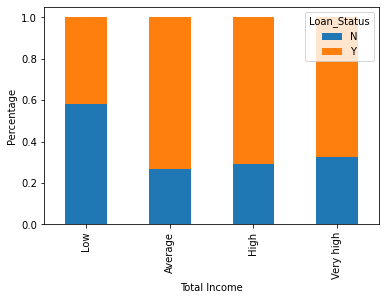

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total Income')
P=plt.ylabel('Percentage')

We can observe Proportion of loans getting approved for applicants having low Total_Income <  applicants with Average, High & Very High Income.

# Loan Amount vs Loan Status

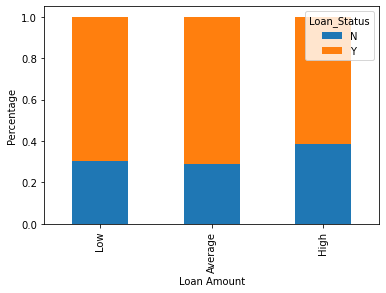

In [ ]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Loan Amount')
P=plt.ylabel('Percentage')

#Here  proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.
#Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable. 
#We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. 
#One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [ ]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

#The correlation between all the numerical variables. We will use the heat map to visualize the correlation.
#Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

<AxesSubplot:>

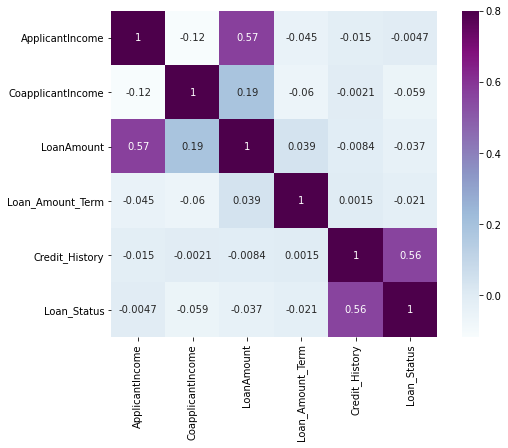

In [ ]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

#correlate variables are 
#ApplicantIncome — LoanAmount
#Credit_History — Loan_Status
#LoanAmount is also correlated with CoapplicantIncome.

# Missing value imputation

In [ ]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [ ]:
#Here missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History 
#methods to fill the missing values:
#For numerical variables: imputation using mean or median
#For categorical variables: imputation using mode

 Fill Missing values by mode in Gender, Married, Dependents, Credit_History, and Self_Employed

In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [ ]:
# find  missing values in Loan_Amount_Term.

In [ ]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
#value of 360 is repeating the 512 times so we  can fill missing value by mode

In [ ]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [ ]:
# LoanAmount variabl is a numerical variable we can use mean or median to fill missing values
#loan amount has outliers instead of mean we can use median

In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
#Check  here missing values are filled in the dataset.

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


In [ ]:
# Lets fill all the missing values in the test dataset like train dataset
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

# Outlier Treatment

In [ ]:
# lets  first consider how to remove  outliers of LoanAmount.
#bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness.
#we can remove the skewness is by doing the log transformation

<AxesSubplot:>

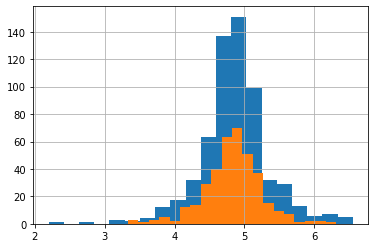

In [ ]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

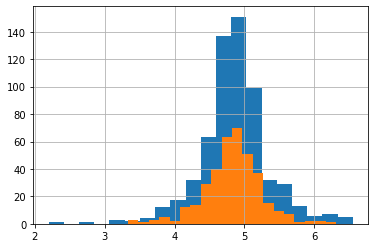

In [ ]:
train['LoanAmount']=np.log(train['LoanAmount'])
train['LoanAmount'].hist(bins=20)
test['LoanAmount']=np.log(test['LoanAmount'])
test['LoanAmount'].hist(bins=20)

In [ ]:
# Here distribution looks much closer to normal and the effect of extreme values has been significantly subsided.

#Skewness and kurtosis of Train Data

In [ ]:
from scipy.stats import skew
#creating data frame
df=pd.DataFrame(train)
print("The value of Skewness is:")
#calculating the skewness
print(df.skew())
print("*****************************")
print("The value of kurtosis is:")
#calculating the kurtosis
print(df.kurtosis())

The value of Skewness is:
Dependents           1.015551
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount          -0.195355
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Loan_Status         -0.809998
LoanAmount_log      -0.195355
dtype: float64
*****************************
The value of kurtosis is:
Dependents           -0.347376
ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount            2.818819
Loan_Amount_Term      6.924993
Credit_History        2.095179
Loan_Status          -1.348306
LoanAmount_log        2.818819
dtype: float64


# Skewness and kurtosis of test data

In [ ]:
#creating data frame
df=pd.DataFrame(test)
print("The value of Skewness is:")
#calculating the skewness
print(df.skew())
print("*****************************")
print("The value of kurtosis is:")
#calculating the kurtosis
print(df.kurtosis())

The value of Skewness is:
Dependents           0.938056
ApplicantIncome      8.441375
CoapplicantIncome    4.257357
LoanAmount          -0.253112
Loan_Amount_Term    -2.709537
Credit_History      -1.854721
LoanAmount_log      -0.253112
dtype: float64
*****************************
The value of kurtosis is:
Dependents            -0.576900
ApplicantIncome      103.127490
CoapplicantIncome     30.191142
LoanAmount             1.800622
Loan_Amount_Term       8.866289
Credit_History         1.447852
LoanAmount_log         1.800622
dtype: float64


# Remove skewness by power transformation

Text(0.5, 1.0, 'Probplot against normal distribution (train data)')

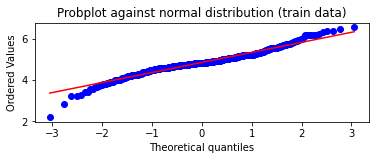

In [ ]:
import scipy.stats as stats  
ax1 = plt.subplot(211)
stats.probplot(train['LoanAmount'], dist=stats.norm,plot=ax1)
ax1.set_title('Probplot against normal distribution (train data)')

<AxesSubplot:>

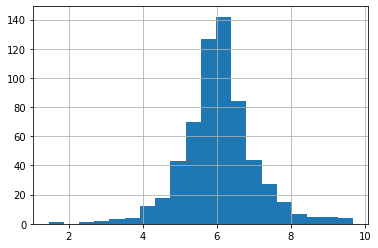

In [ ]:
#*********************train  Data remove Skewness from LoanAmount *******************
from scipy.stats import boxcox
train['LoanAmount_BC']=boxcox(train['LoanAmount'])[0]
train['LoanAmount_BC'].hist(bins=20)

Text(0.5, 1.0, 'Probplot after BoxCox Tranformation (train data)')

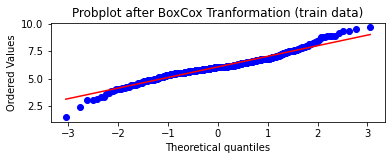

In [ ]:
ax2 = plt.subplot(212)
stats.probplot(train['LoanAmount_BC'], dist=stats.norm,plot=ax2)
ax2.set_title('Probplot after BoxCox Tranformation (train data)')

Text(0.5, 1.0, 'Probplot against normal distribution (test data)')

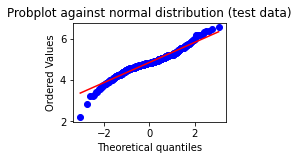

In [ ]:
import scipy.stats as stats  
ax3 = plt.subplot(222)
stats.probplot(train['LoanAmount'], dist=stats.norm,plot=ax3)
ax3.set_title('Probplot against normal distribution (test data)')

<AxesSubplot:>

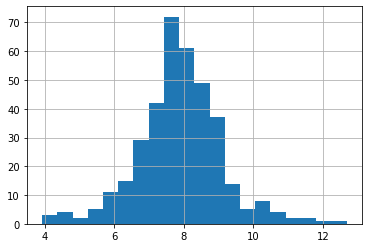

In [ ]:
#*********************Test Data remove Skewness from LoanAmount *******************
test['LoanAmount_BC']=boxcox(test['LoanAmount'])[0]
test['LoanAmount_BC'].hist(bins=20)

Text(0.5, 1.0, 'Probplot after BoxCox Tranformation (test data)')

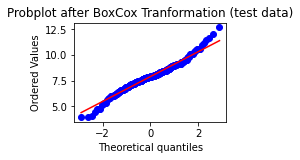

In [ ]:
from scipy.stats import boxcox
ax4 = plt.subplot(223)
stats.probplot(test['LoanAmount_BC'], dist=stats.norm,plot=ax4)
ax4.set_title('Probplot after BoxCox Tranformation (test data)')

In [ ]:
print(df.skew())

Dependents           0.938056
ApplicantIncome      8.441375
CoapplicantIncome    4.257357
LoanAmount          -0.253112
Loan_Amount_Term    -2.709537
Credit_History      -1.854721
LoanAmount_log      -0.253112
LoanAmount_BC        0.079199
dtype: float64


In [ ]:
#Logistic Regression is a classification algorithm
#Logistic Regression which is used for predicting binary outcome.
#It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
#Logistic regression is an estimation of Logit function. The logit function is simply a log of odds in favor of the event.
#This function creates an S-shaped curve with the probability estimate, which is very similar to the required stepwise function

In [ ]:
# Loan_ID variable as it does not have any effect on the loan status.Remove it from train and test dataset

In [ ]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [ ]:
#drop our target variable from the training dataset and save it in another dataset.
# As Sklearn requires the target variable in a separate dataset.  

In [ ]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [ ]:
#“Gender” variable. It has two classes, Male and Female.
#logistic regression takes only the numerical values as input
#“Gender” variable into two dummy  variables(Gender_Male and Gender_Female)
#Gender_Male= 0 if  gender = Female  and Gender_Male= 1 if gender= Male.

In [ ]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [ ]:
#divide our train dataset in 2 parts : train and validation. 
#We can train the model on this training part and using that make predictions for the validation part.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)
#import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
model = LogisticRegression()
model.fit(x_train, y_train)
#predict the Loan_Status for validation set and calculate its accuracy.
pred_cv = model.predict(x_cv)
a1=accuracy_score(y_cv,pred_cv)
a= log_loss(y_cv,pred_cv) 
print("\n Mean Validation Accuracy: %f",a1)
print("Log_loss: %f" %a)


 Mean Validation Accuracy: %f 0.8324324324324325
Log_loss: 5.787682


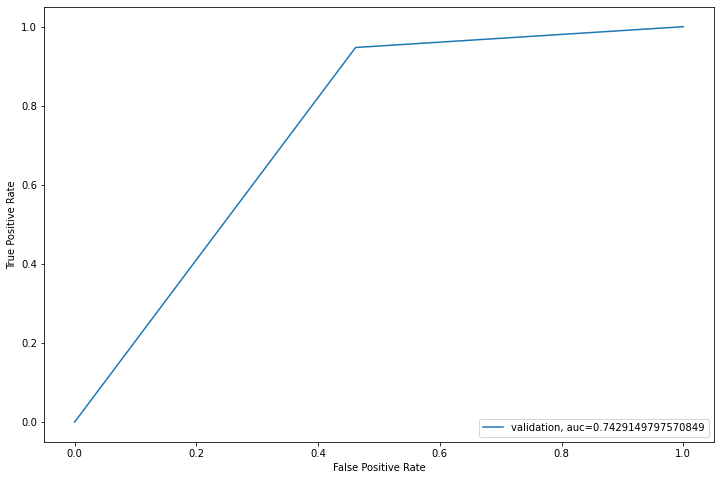

0.7429149797570849


In [ ]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_cv, pred_cv)
auc = metrics.roc_auc_score(y_cv, pred_cv)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()
print(auc)

# Random Undersampling

In [ ]:
# summarize class distribution
print("Before undersampling: ", Counter(y_train))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
x_train_under, y_train_under = undersample.fit_resample(x_train, y_train)

# summarize class distribution
print("After undersampling: ", Counter(y_train_under))

#PART 2
# import SVM libraries 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=SVC()
clf_under = model.fit(x_train_under, y_train_under)
pred_under = clf_under.predict(x_cv)

print("ROC AUC score for undersampled data: ", roc_auc_score(y_cv, pred_under))

Before undersampling:  Counter({1: 289, 0: 140})
After undersampling:  Counter({0: 140, 1: 140})
ROC AUC score for undersampled data:  0.5334731058415269


# 2. Oversampling with SMOTE

In [ ]:
# import SMOTE oversampling and other necessary libraries 
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
# summarize class distribution
print("Before oversampling: ",Counter(y_train))
# define oversampling strategy
SMOTE = SMOTE()
# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train, y_train)
# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

#PART 2
# import SVM libraries 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=SVC()
clf_SMOTE = model.fit(x_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(x_cv)

print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_cv, pred_SMOTE))

Before oversampling:  Counter({1: 289, 0: 140})
After oversampling:  Counter({1: 289, 0: 289})
ROC AUC score for oversampled SMOTE data:  0.47296124927703875


In [ ]:
#predictions are almost 82% accurate, i.e. we have identified 80% of the loan status correctly.

In [ ]:
#make predictions for the test dataset

In [ ]:
pred_test = model.predict(test)

In [ ]:
# import the submission file which we have to submit on the solution checker.
submission = pd.read_csv('E:/Project/sample_submission.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [ ]:
#We only need the Loan_ID and the corresponding Loan_Status for the final submission.
#we will fill these columns with the Loan_ID of the test dataset and the predictions that we made, -->> pred_test respectively.

In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
#convert 1 and 0 to Y and N.because predictions in Y and N.
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
#converted the submission to .csv format.
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('E:/Project/logistic.csv')

The chances of getting a loan will be higher for:
Applicants having a credit history (we observed this in exploration).
Applicants with higher applicant and co-applicant incomes.
Applicants with higher education level.
Properties in urban areas with high growth perspectives.
So let’s make our model with ‘Credit_History’, ‘Education’ & ‘Gender’.

In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
#Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

In [ ]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log1.csv')

## Feature Engineering


Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:
Total Income — As discussed during bivariate analysis we will combine the Applicant Income and Co-applicant Income.
If the total income is high, the chances of loan approval might also be high.
EMI — EMI is the monthly amount to be paid by the applicant to repay the loan. 
The idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan.
We can calculate the EMI by taking the ratio of the loan amount with respect to the loan amount term.
Balance Income — This is the income left after the EMI has been paid. 
The idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

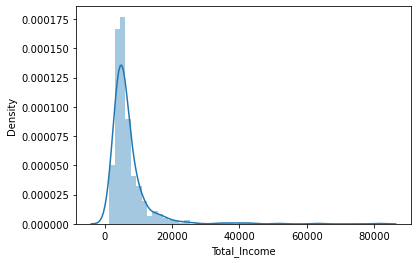

In [ ]:
#the distribution of Total Income.
sns.distplot(train['Total_Income'])

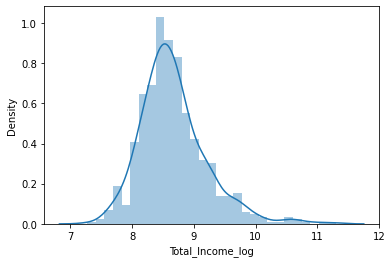

In [ ]:
#it is shifted towards left, i.e., the distribution is right-skewed. So, let’s take the log transformation to make the distribution normal.
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

In [ ]:
#the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. Let’s create the EMI feature now.
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

<AxesSubplot:xlabel='EMI', ylabel='Density'>

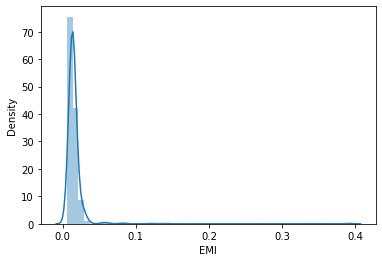

In [ ]:
#check the distribution of the EMI variable.
sns.distplot(train['EMI'])

<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

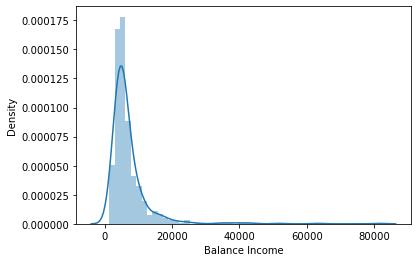

In [ ]:
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])

In [ ]:
#feature_importances_ attribute of sklearn to do so.
#importances=pd.Series(model.feature_importances_, index=X.columns)
#importances.plot(kind='barh', figsize=(12,8))

In [ ]:
#to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

# Model Building: Part II

# Logistic Regression using stratified k-folds cross-validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

In [ ]:
X = train.drop('Loan_Status',axis=1)
y = train.Loan_Status
import logging as log

In [ ]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {}'.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = LogisticRegression(random_state=1)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 l3 = log_loss(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test=model.predict(xvl)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))
print("Log_loss: %f" % l3)



1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.7723577235772358

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7295081967213115

 Mean Validation Accuracy 0.7751699320271891
Log_loss: 9.342607


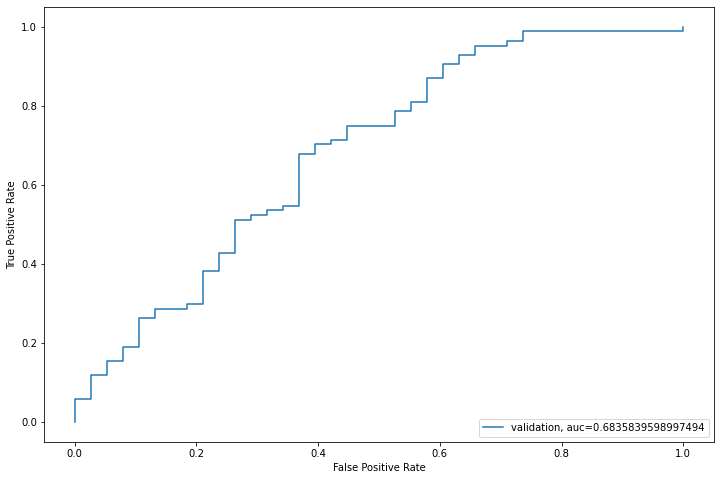

0.6835839598997494


In [ ]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()
print(auc)

In [ ]:
cm = confusion_matrix(yvl, pred_test)
print(cm)

[[15 23]
 [10 74]]


# Decision Tree

In [ ]:
from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    l2 = log_loss(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))
print("Log_loss: %f" % l2)
print(model)


1 of kfold 5 
accuracy_score 0.7804878048780488

2 of kfold 5 
accuracy_score 0.7886178861788617

3 of kfold 5 
accuracy_score 0.7235772357723578

4 of kfold 5 
accuracy_score 0.7479674796747967

5 of kfold 5 
accuracy_score 0.6721311475409836

 Mean Validation Accuracy 0.7425563108090099
Log_loss: 11.324320
DecisionTreeClassifier(random_state=1)


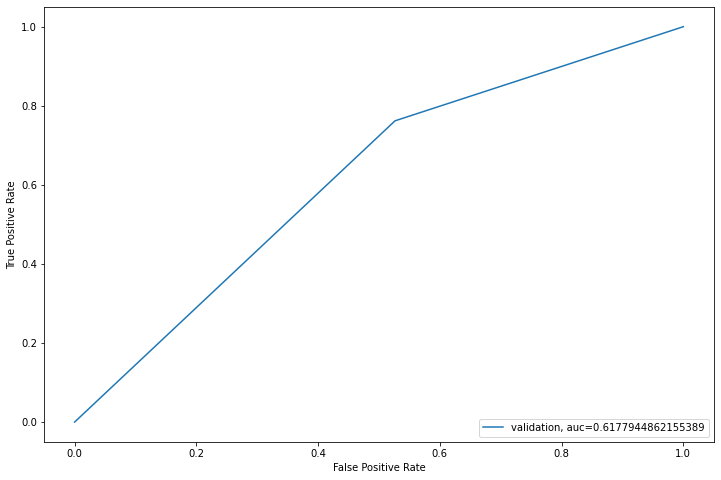

0.6177944862155389


In [ ]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()
print(auc)

<AxesSubplot:>

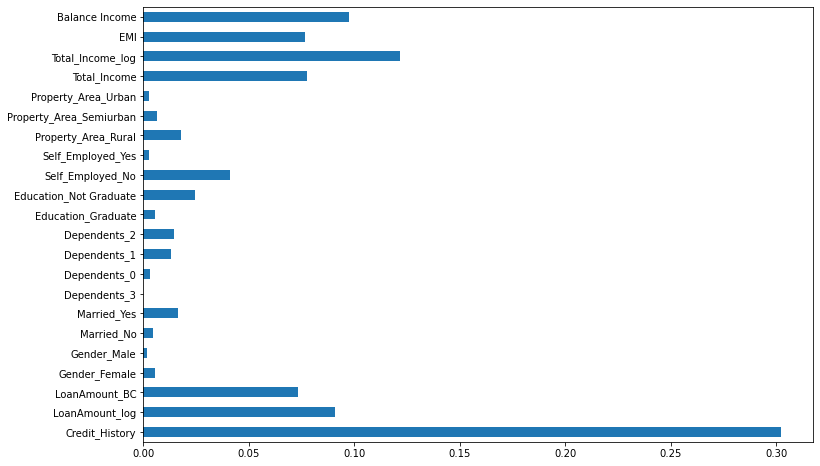

In [ ]:
#feature_importances_ attribute of sklearn to do so.
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

# Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = RandomForestClassifier(random_state=1, max_depth=10)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 l4 = log_loss(yvl,pred_test)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))
print("Log_loss: %f" %l4)
print(model)


1 of kfold 5 
accuracy_score 0.8373983739837398

2 of kfold 5 
accuracy_score 0.8211382113821138

3 of kfold 5 
accuracy_score 0.8048780487804879

4 of kfold 5 
accuracy_score 0.8048780487804879

5 of kfold 5 
accuracy_score 0.7786885245901639

 Mean Validation Accuracy 0.8093962415033987
Log_loss: 7.643985
RandomForestClassifier(max_depth=10, random_state=1)


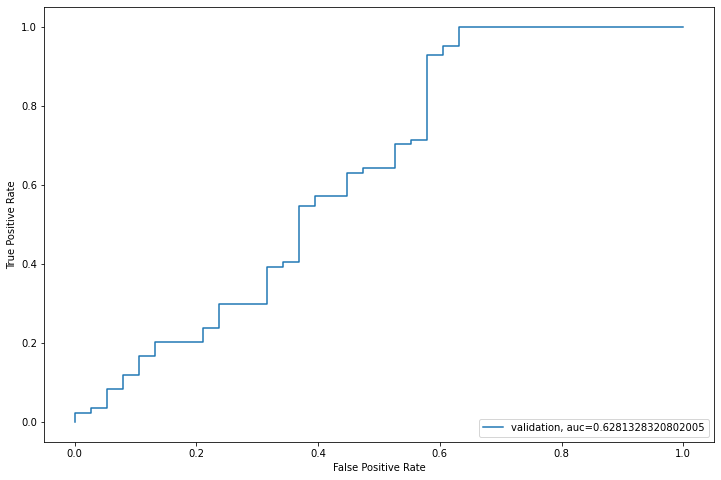

0.6281328320802005


In [ ]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()
print(auc)

<AxesSubplot:>

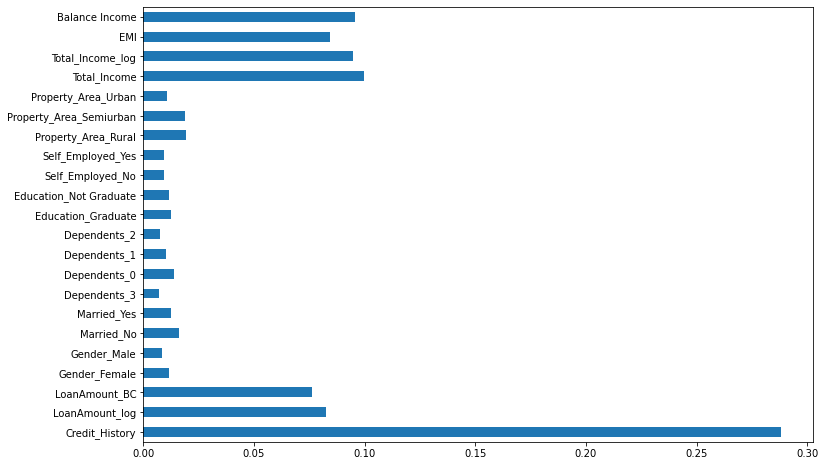

In [ ]:
#feature_importances_ attribute of sklearn to do so.
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

# XGBOOST

In [ ]:
from xgboost import XGBClassifier
i=1 
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
 print('\n{} of kfold {}'.format(i,kf.n_splits)) 
 xtr,xvl = X.loc[train_index],X.loc[test_index] 
 ytr,yvl = y[train_index],y[test_index] 
 model = XGBClassifier(n_estimators=50, max_depth=4,eval_metric="logloss") 
 model.fit(xtr, ytr) 
 pred_test = model.predict(xvl) 

 score = accuracy_score(yvl,pred_test) 
 l5= log_loss(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))
print("Log_loss: %f" %l5)
print(model)



1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.7642276422764228

3 of kfold 5
accuracy_score 0.7886178861788617

4 of kfold 5
accuracy_score 0.7479674796747967

5 of kfold 5
accuracy_score 0.7622950819672131

 Mean Validation Accuracy 0.7703451952552312
Log_loss: 8.210181
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=6,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)


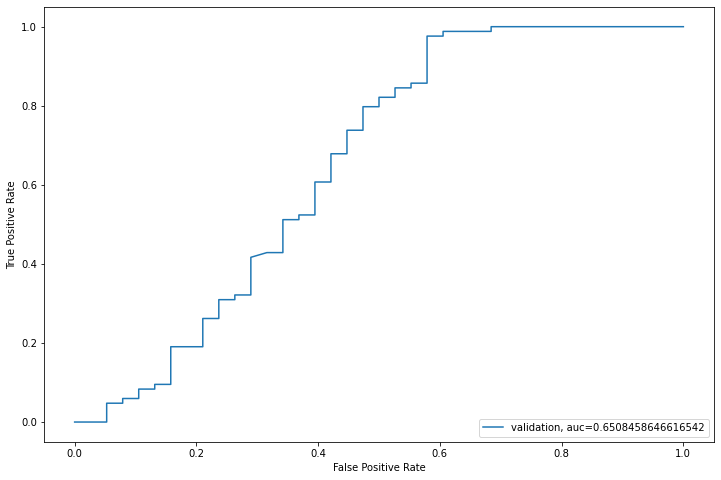

0.6508458646616542


In [ ]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()
print(auc)

<AxesSubplot:>

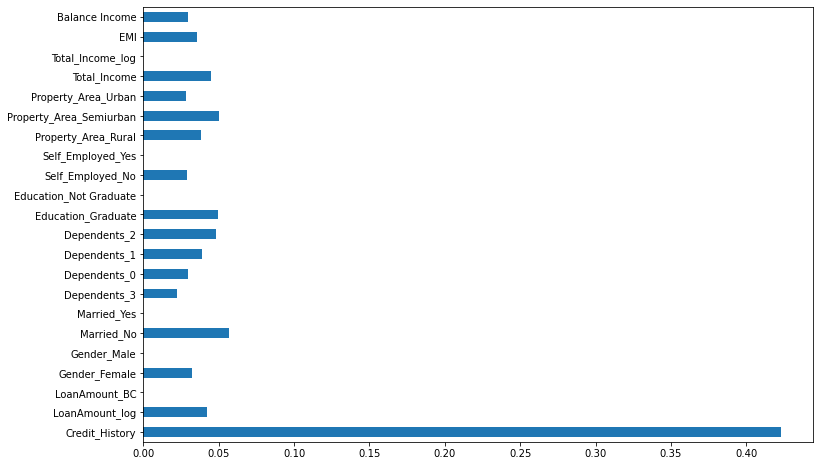

In [ ]:
#feature_importances_ attribute of sklearn to do so.
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

## Model Evaluation


In [ ]:
# algorithm Comparion
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          ('DecTree', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier(random_state=1, max_depth=10)),
          ('XGBOOST', XGBClassifier(n_estimators=50, max_depth=4,eval_metric="logloss"))]
         

In [ ]:
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=None)
    results = model_selection.cross_val_score(model, X, y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

LogReg| Mean=0.796563 STD=0.037769
DecTree| Mean=0.703728 STD=0.050691
RF| Mean=0.794976 STD=0.038921
XGBOOST| Mean=0.773823 STD=0.043419


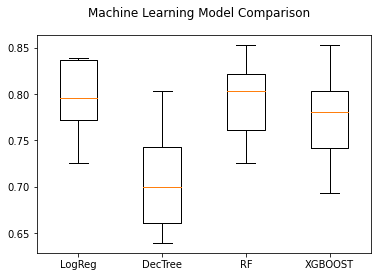

In [ ]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()